<a href="https://colab.research.google.com/github/oilnutttt/bsc_dpdm22/blob/main/Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Load digits dataset
digits = load_digits()

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 432x288 with 0 Axes>

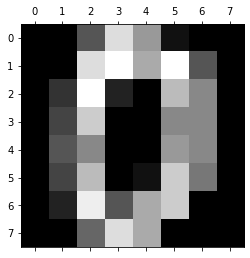

In [ ]:
plt.gray()
plt.matshow(digits.images[0])

8


<Figure size 432x288 with 0 Axes>

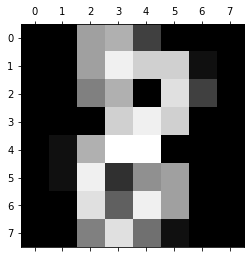

In [ ]:
ind = 28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])

# Quiz 3 march
- แบ่ง data ออกเป็น 80(train) 20(test) โดยใช้ random_state = 9
- หา parameters ที่ดีที่สุด (K (1,3,5) ) Distance_weighted (yes/no) ด้วย 10-fold-cross-validation
- test parameters ที่ดีที่สุด  กับ test_data

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=9)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## model selection

In [ ]:
# model 1 (K=1, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

# model 2 (K=3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3weighted", scores.mean())

# model 3 (K=5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5weighted", scores.mean())

# model 4 (K=1, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

# model 5 (K=3, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3NOweighted", scores.mean())

# model 6 (K=5, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5NOweighted", scores.mean())

Mean Cross-Validation Score: K1weighted 0.9874757187257188
Mean Cross-Validation Score: K3weighted 0.9860771173271173
Mean Cross-Validation Score: K5weighted 0.9853826728826729
Mean Cross-Validation Score: K1NOweighted 0.9874757187257188
Mean Cross-Validation Score: K3NOweighted 0.9853778166278166
Mean Cross-Validation Score: K5NOweighted 0.9860819735819737


## Evaluate with test set

เลือก K 1 เพราะ มีค่า Mean Cross-Validation Score (weight) มากที่สุด

In [ ]:
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')

knn_distance.fit(X_train,y_train)

y_pred = knn_distance.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are the true and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score: ", accuracy)


Accuracy score:  0.9916666666666667


# HW 7 
หา โมเดลที่ดีที่สุด จาก DT,NaiveBayes,KNN,ANN โดย เปรียบเทียบ อย่างละสอง parameter sets 

## DecisionTree

parameter 1 max_depth = 3

In [ ]:
#import
from sklearn.tree import DecisionTreeClassifier

#define
clf1 = DecisionTreeClassifier(max_depth=3, random_state=9)

#train
clf1.fit(X_train,y_train)

#predict - evaluate
y_predict = clf1.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        45
           3       0.16      0.91      0.27        34
           4       0.00      0.00      0.00        41
           5       0.64      0.92      0.76        39
           6       0.72      0.90      0.80        29
           7       0.65      0.61      0.63        28
           8       0.00      0.00      0.00        36
           9       1.00      0.34      0.51        35

    accuracy                           0.42       360
   macro avg       0.42      0.46      0.39       360
weighted avg       0.38      0.42      0.36       360



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


parameter 2 max_depth = 5, min_samples_split = 3

In [ ]:
#import
from sklearn.tree import DecisionTreeClassifier

#define
clf2 = DecisionTreeClassifier(max_depth=5, min_samples_split = 3, random_state=9)

#train
clf2.fit(X_train,y_train)

#predict - evaluate
y_predict2 = clf2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.45      0.25      0.32        40
           2       0.45      0.11      0.18        45
           3       0.44      0.82      0.58        34
           4       0.94      0.71      0.81        41
           5       0.94      0.87      0.91        39
           6       0.87      0.90      0.88        29
           7       0.73      0.57      0.64        28
           8       0.28      0.81      0.42        36
           9       1.00      0.34      0.51        35

    accuracy                           0.61       360
   macro avg       0.71      0.63      0.62       360
weighted avg       0.70      0.61      0.60       360



## NaiveBayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

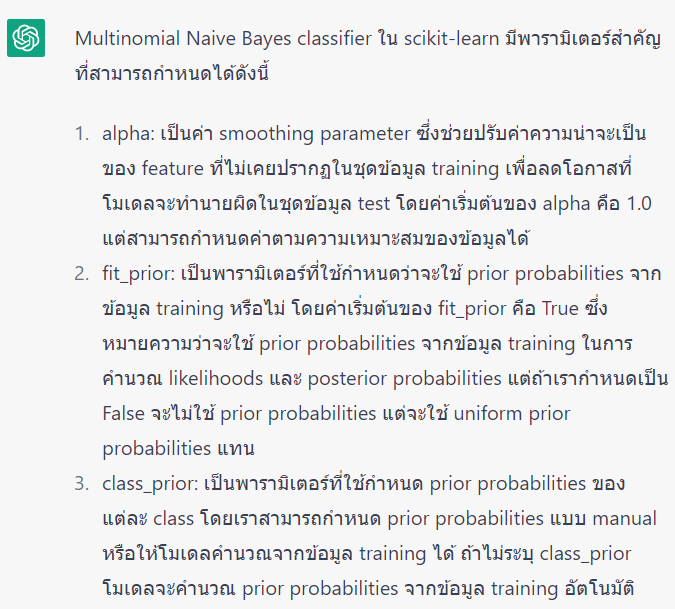

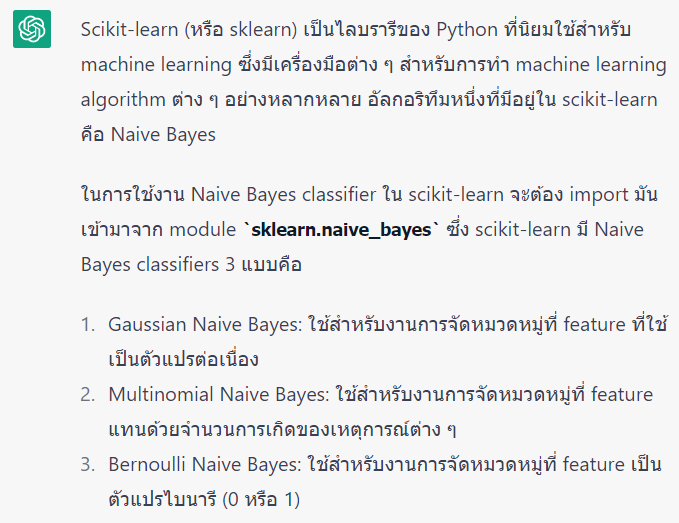


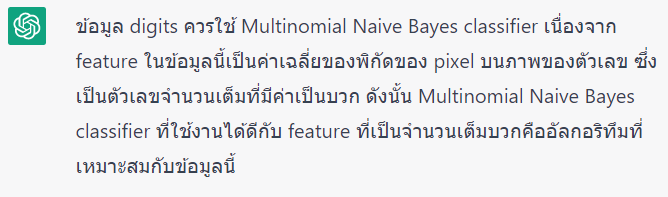

parameter 1 alpha=0.1

In [ ]:
# Define Multinomial Naive Bayes classifier with alpha=0.1 and fit_prior=False
nbc1 = MultinomialNB(alpha=0.9)

# Train classifier
nbc1.fit(X_train, y_train)

# Evaluate classifier
y_pred = nbc1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.883


parameter 2 alpha=1, fit_prior=False

In [ ]:
# Define Multinomial Naive Bayes classifier with alpha=0.1 and fit_prior=False
nbc2 = MultinomialNB(alpha=1, fit_prior=False)

# Train classifier
nbc2.fit(X_train, y_train)

# Evaluate classifier
y_pred2 = nbc2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2:.3f}")

Accuracy: 0.883


## KNN

parameter 1 n_neighbors = 1, weights='distance'

In [ ]:
#K=1, weighted
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

Mean Cross-Validation Score: K1weighted 0.9874757187257188


parameter 2 n_neighbors = 3, weights='uniform'

In [ ]:
#K=3, no weighted
knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_uniform, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

Mean Cross-Validation Score: K1NOweighted 0.9853778166278166


## ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

parameter 1 hidden_layer_sizes=(8,8)

In [ ]:
# Create a Multi-layer Perceptron classifier
clf = MLPClassifier(hidden_layer_sizes = (8, 8), activation = 'tanh',max_iter = 1000, random_state=9)
# Perform 10-fold cross-validation and compute the mean accuracy
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean cross-validation score: ANN', scores.mean());

Mean cross-validation score: ANN 0.9019036519036521


parameter 2 hidden_layer_sizes=(12,12)

In [ ]:
# Create a Multi-layer Perceptron classifier
clf = MLPClassifier(hidden_layer_sizes = (12, 12), activation = 'tanh',max_iter = 1000, random_state=9)
# Perform 10-fold cross-validation and compute the mean accuracy
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Mean cross-validation score: ANN', scores.mean());

Mean cross-validation score: ANN 0.9289918414918417


## โมเดลที่ดีที่สุด

In [ ]:
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

Mean Cross-Validation Score: K1weighted 0.9874757187257188
